In [1]:
import numpy as np
import tensorflow as tf
from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.model import LstmForecast
from ts.plot import Plot

# Training Data

In [2]:
n = 21500
trainN = 21000
seqLength = 500
numSeqPlot = 5

trainData, testData = Utility.trainTestSplit(
    np.expand_dims(StandardGenerator('long_term').generate(n), axis=1),
    trainN
)

In [3]:
trainSequences = Utility.breakSeq(trainData, seqLength=seqLength)

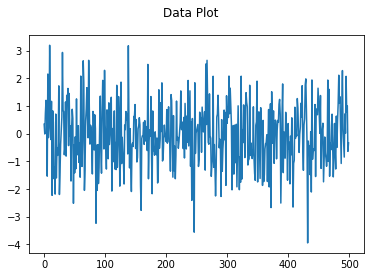

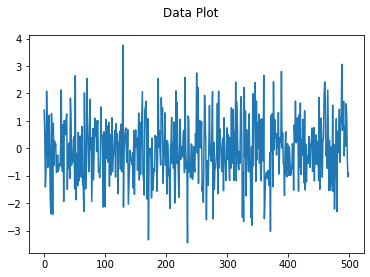

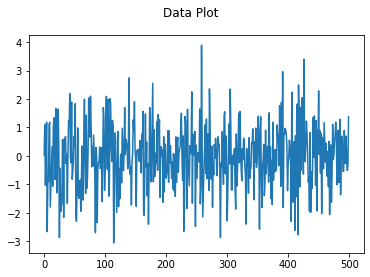

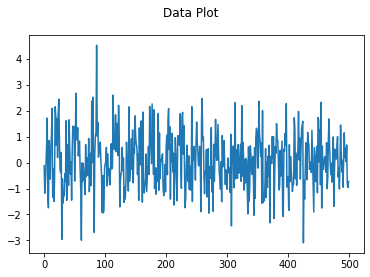

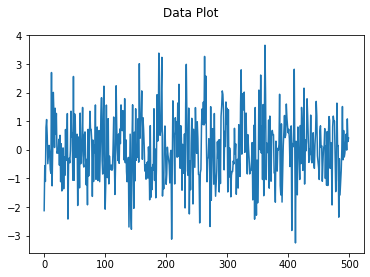

In [4]:
for i in range(numSeqPlot):
    Plot.plotDataCols(trainSequences[
        np.random.randint(0, len(trainSequences))
    ])

# Trial 1

In [5]:
model = LstmForecast(
    forecastHorizon=1,
    stateSize=20,
    activation='tanh',
    numRnnLayers=2
)

model.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 20)          1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 20)          3280      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 1)           21        
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [6]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=35,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.07,
            15,
            0.97
        )
    )
)

Epoch 1/35
42/42 [==============================] - 11s 256ms/step - loss: 1.2027
Epoch 2/35
42/42 [==============================] - 10s 232ms/step - loss: 1.1699
Epoch 3/35
42/42 [==============================] - 10s 243ms/step - loss: 1.1691
Epoch 4/35
42/42 [==============================] - 10s 233ms/step - loss: 1.1557
Epoch 5/35
42/42 [==============================] - 9s 222ms/step - loss: 1.1530
Epoch 6/35
42/42 [==============================] - 9s 224ms/step - loss: 1.1458
Epoch 7/35
42/42 [==============================] - 9s 225ms/step - loss: 1.1308
Epoch 8/35
42/42 [==============================] - 9s 217ms/step - loss: 1.1340
Epoch 9/35
42/42 [==============================] - 9s 217ms/step - loss: 1.1283
Epoch 10/35
42/42 [==============================] - 10s 228ms/step - loss: 1.1251
Epoch 11/35
42/42 [==============================] - 10s 226ms/step - loss: 1.1250
Epoch 12/35
42/42 [==============================] - 9s 226ms/step - loss: 1.1209
Epoch 13/35
42/42 [

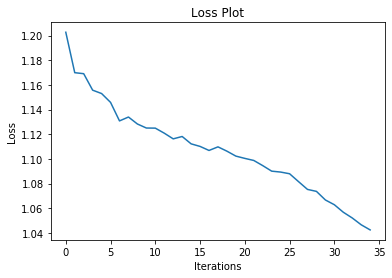

In [7]:
Plot.plotLoss(loss)

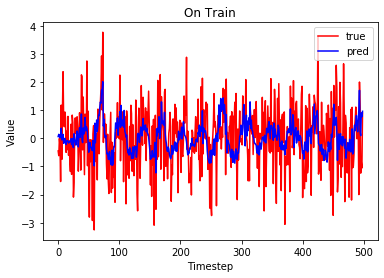

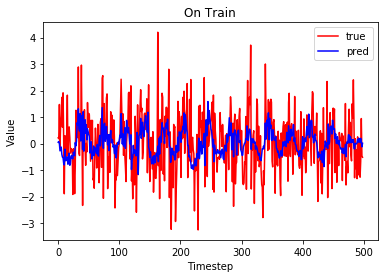

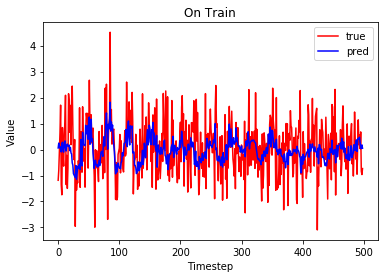

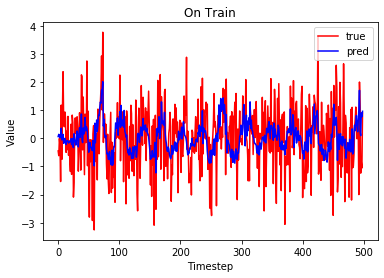

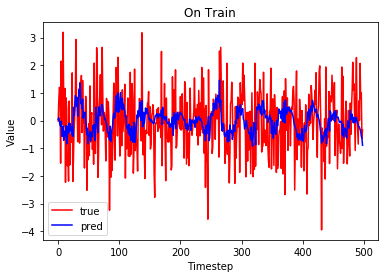

In [8]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, len(trainSequences))
    evalLoss, Ypred = model.evaluate(trainSequences[idx], returnPred=True)
    Ytrue = trainSequences[idx][1:]

    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

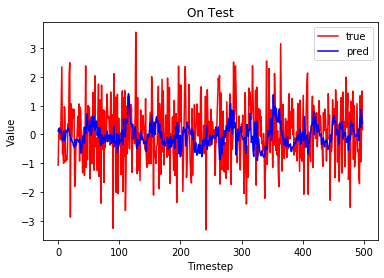

In [9]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

# Trial 2

In [10]:
model = LstmForecast(
    forecastHorizon=1,
    stateSize=50,
    activation='tanh',
    numRnnLayers=3
)

model.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 50)          20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 50)          20200     
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1)           51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=15,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.01,
            20,
            0.96
        )
    )
)

Epoch 1/15
42/42 [==============================] - 21s 492ms/step - loss: 1.1682
Epoch 2/15
42/42 [==============================] - 21s 502ms/step - loss: 1.1559
Epoch 3/15
42/42 [==============================] - 19s 460ms/step - loss: 1.1436
Epoch 4/15
42/42 [==============================] - 16s 373ms/step - loss: 1.1366
Epoch 5/15
42/42 [==============================] - 17s 400ms/step - loss: 1.1425
Epoch 6/15
42/42 [==============================] - 16s 377ms/step - loss: 1.1337
Epoch 7/15
42/42 [==============================] - 16s 383ms/step - loss: 1.1330
Epoch 8/15
42/42 [==============================] - 16s 379ms/step - loss: 1.1273
Epoch 9/15
42/42 [==============================] - 17s 408ms/step - loss: 1.1245
Epoch 10/15
42/42 [==============================] - 16s 381ms/step - loss: 1.1184
Epoch 11/15
42/42 [==============================] - 19s 445ms/step - loss: 1.1243
Epoch 12/15
42/42 [==============================] - 15s 361ms/step - loss: 1.1139
Epoch 13/15
4

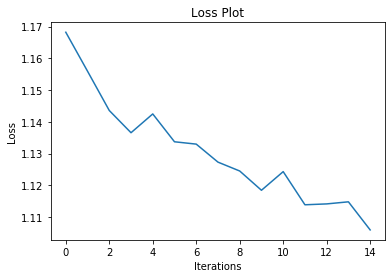

In [12]:
Plot.plotLoss(loss)

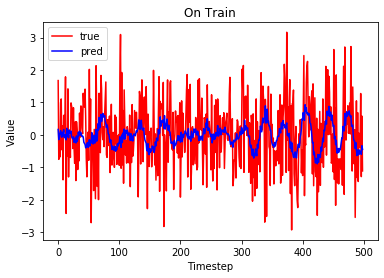

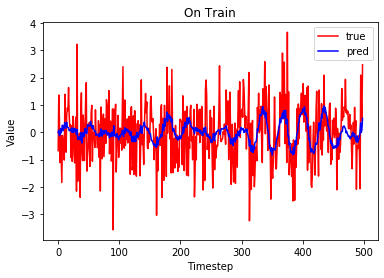

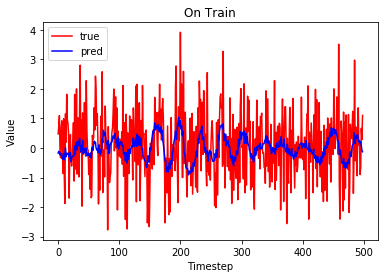

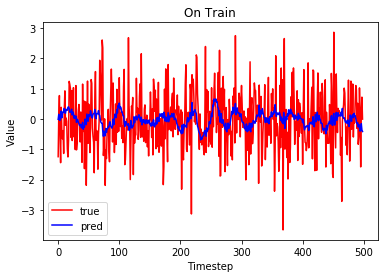

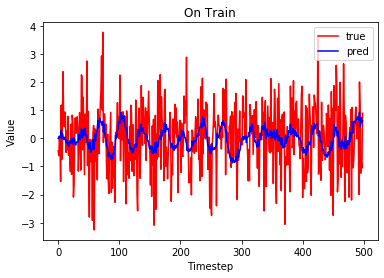

In [13]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, len(trainSequences))
    evalLoss, Ypred = model.evaluate(trainSequences[idx], returnPred=True)
    Ytrue = trainSequences[idx][1:]

    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

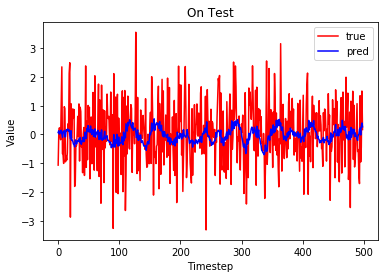

In [14]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

# Trial 3

In [15]:
model = LstmForecast(
    forecastHorizon=1,
    stateSize=100,
    activation='tanh',
    numRnnLayers=2
)

model.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 100)         40800     
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 100)         80400     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1)           101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [16]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=20,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.01,
            20,
            0.97
        )
    )
)

Epoch 1/20
42/42 [==============================] - 11s 259ms/step - loss: 1.1898
Epoch 2/20
42/42 [==============================] - 11s 255ms/step - loss: 1.1551
Epoch 3/20
42/42 [==============================] - 10s 228ms/step - loss: 1.1399
Epoch 4/20
42/42 [==============================] - 10s 241ms/step - loss: 1.1326
Epoch 5/20
42/42 [==============================] - 13s 305ms/step - loss: 1.1350
Epoch 6/20
42/42 [==============================] - 12s 297ms/step - loss: 1.1301
Epoch 7/20
42/42 [==============================] - 12s 296ms/step - loss: 1.1322
Epoch 8/20
42/42 [==============================] - 13s 299ms/step - loss: 1.1252
Epoch 9/20
42/42 [==============================] - 13s 305ms/step - loss: 1.1248
Epoch 10/20
42/42 [==============================] - 12s 274ms/step - loss: 1.1198
Epoch 11/20
42/42 [==============================] - 12s 294ms/step - loss: 1.1270
Epoch 12/20
42/42 [==============================] - 11s 255ms/step - loss: 1.1156
Epoch 13/20
4

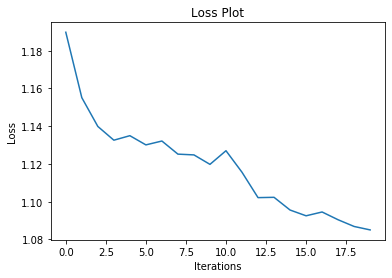

In [17]:
Plot.plotLoss(loss)

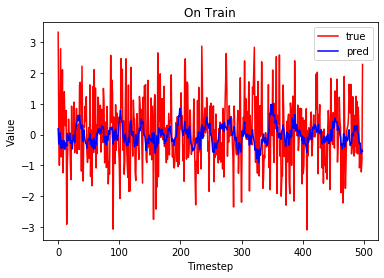

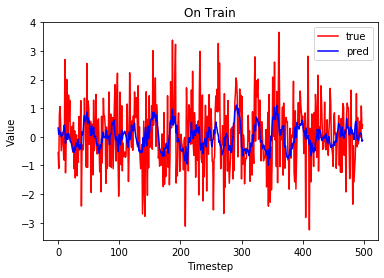

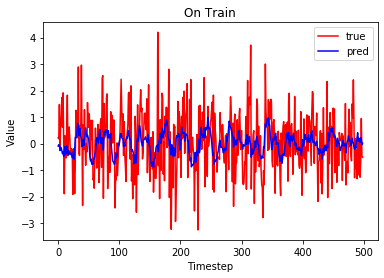

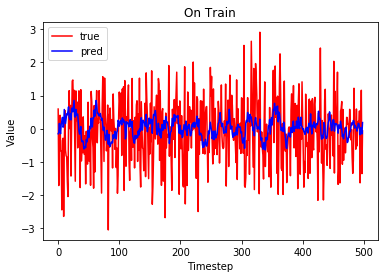

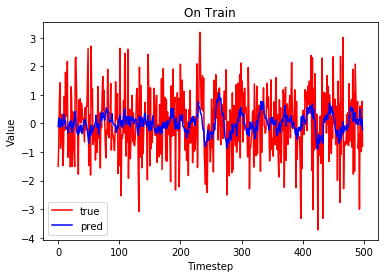

In [18]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, len(trainSequences))
    evalLoss, Ypred = model.evaluate(trainSequences[idx], returnPred=True)
    Ytrue = trainSequences[idx][1:]

    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

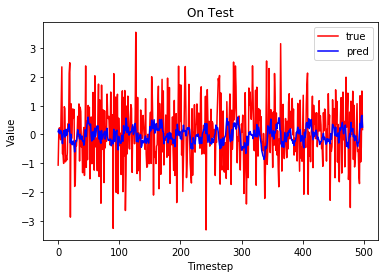

In [19]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

Plot.plotPredTrue(Ypred, Ytrue, 'On Test')

# Train Best

In [27]:
model = LstmForecast(
    forecastHorizon=1,
    stateSize=120,
    activation='tanh',
    numRnnLayers=3
)

model.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, None, 120)         58560     
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 120)         115680    
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 120)         115680    
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 1)           121       
Total params: 290,041
Trainable params: 290,041
Non-trainable params: 0
_________________________________________________________________


In [28]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=20,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.04,
            40,
            0.98
        )
    )
)

Epoch 1/20
42/42 [==============================] - 13s 306ms/step - loss: 1.8391
Epoch 2/20
42/42 [==============================] - 12s 291ms/step - loss: 1.2189
Epoch 3/20
42/42 [==============================] - 14s 337ms/step - loss: 1.2104
Epoch 4/20
42/42 [==============================] - 17s 393ms/step - loss: 1.2178
Epoch 5/20
42/42 [==============================] - 18s 420ms/step - loss: 1.2144
Epoch 6/20
42/42 [==============================] - 17s 404ms/step - loss: 1.2163
Epoch 7/20
42/42 [==============================] - 16s 381ms/step - loss: 1.2125
Epoch 8/20
42/42 [==============================] - 14s 341ms/step - loss: 1.2164
Epoch 9/20
42/42 [==============================] - 12s 286ms/step - loss: 1.2145
Epoch 10/20
42/42 [==============================] - 13s 299ms/step - loss: 1.2142
Epoch 11/20
42/42 [==============================] - 13s 308ms/step - loss: 1.2154
Epoch 12/20
42/42 [==============================] - 12s 294ms/step - loss: 1.2113
Epoch 13/20
4

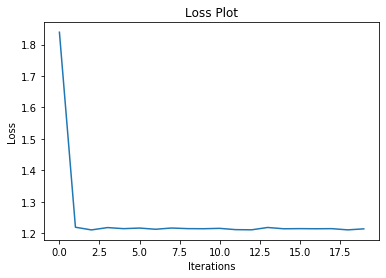

In [29]:
Plot.plotLoss(loss)

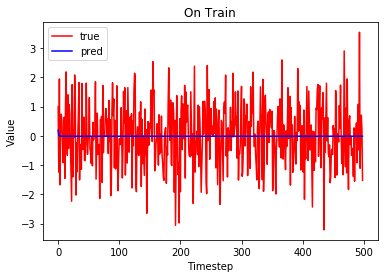

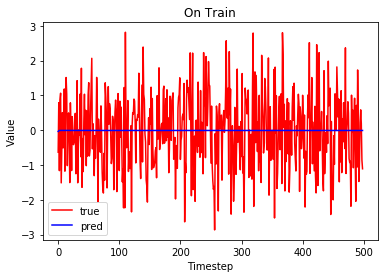

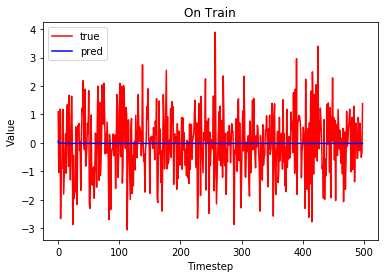

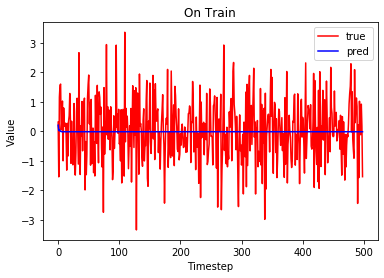

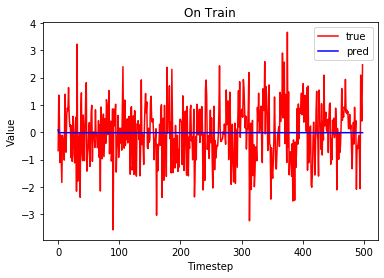

In [30]:
for i in range(numSeqPlot):
    idx = np.random.randint(0, len(trainSequences))
    evalLoss, Ypred = model.evaluate(trainSequences[idx], returnPred=True)
    Ytrue = trainSequences[idx][1:]

    Plot.plotPredTrue(Ypred, Ytrue, 'On Train')

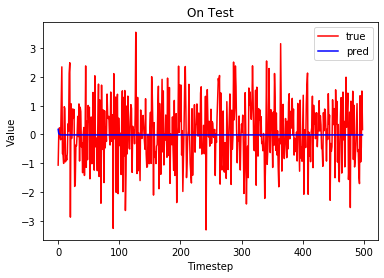

In [31]:
evalLoss, Ypred = model.evaluate(testData, returnPred=True)
Ytrue = testData[1:]

Plot.plotPredTrue(Ypred, Ytrue, 'On Test')